In [421]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
df = pd.read_csv("Data/TheAnhh96.csv.csv")

In [424]:
df

,Friend_count,Follower_count,Following_count,id,Name,Học vấn,Nơi từng sống,Sự kiện trong đời
0,NaN,NaN,NaN,100094458459155,Nguyễn T.An,Trường THCS Vĩnh Quỳnh\nTrường trung học,Hà Nội\nTỉnh/Thành phố hiện tại\nHà Nội\nQuê quán,NaN
1,NaN,NaN,NaN,100089422770844,Son Tung,Trường Đại học Ngoại ngữ - Đại học Quốc gia Hà...,Hà Nội\nTỉnh/Thành phố hiện tại\nLạng Sơn\nQuê...,NaN
2,NaN,NaN,NaN,100088586463474,Nguyễn Duy,NaN,NaN,NaN
3,NaN,NaN,NaN,100088522141816,Vịt Thỉu Lăng,NaN,NaN,NaN
4,NaN,NaN,NaN,100088479566420,Minh Sang,Trường THPT Nguyễn Du BRVT\nTrường trung học,NaN,NaN
...,...,...,...,...,...,...,...,...
1053,NaN,NaN,NaN,100074123837600,Bạn tạm thời bị chặn,NaN,NaN,NaN
1054,175.0,NaN,NaN,100074078832524,Bạn tạm thời bị chặn,NaN,NaN,NaN
1055,152.0,NaN,NaN,100073792717007,Bạn tạm thời bị chặn,NaN,NaN,NaN
1056,NaN,NaN,NaN,100073707776646,Bạn tạm thời bị chặn,NaN,NaN,NaN


Missing value


In [441]:
missing_values = [np.nan, 'N/A', 'na'] 
df = pd.read_csv("Data/TheAnhh96.csv", na_values= missing_values)

In [442]:
missingse = df.isnull().sum() 
missingdf = missingse.to_frame()
missingdf

,0
Friend_count,640
Follower_count,1058
Following_count,1058
id,0
Name,0
Học vấn,1043
Nơi từng sống,1031
Sự kiện trong đời,1056


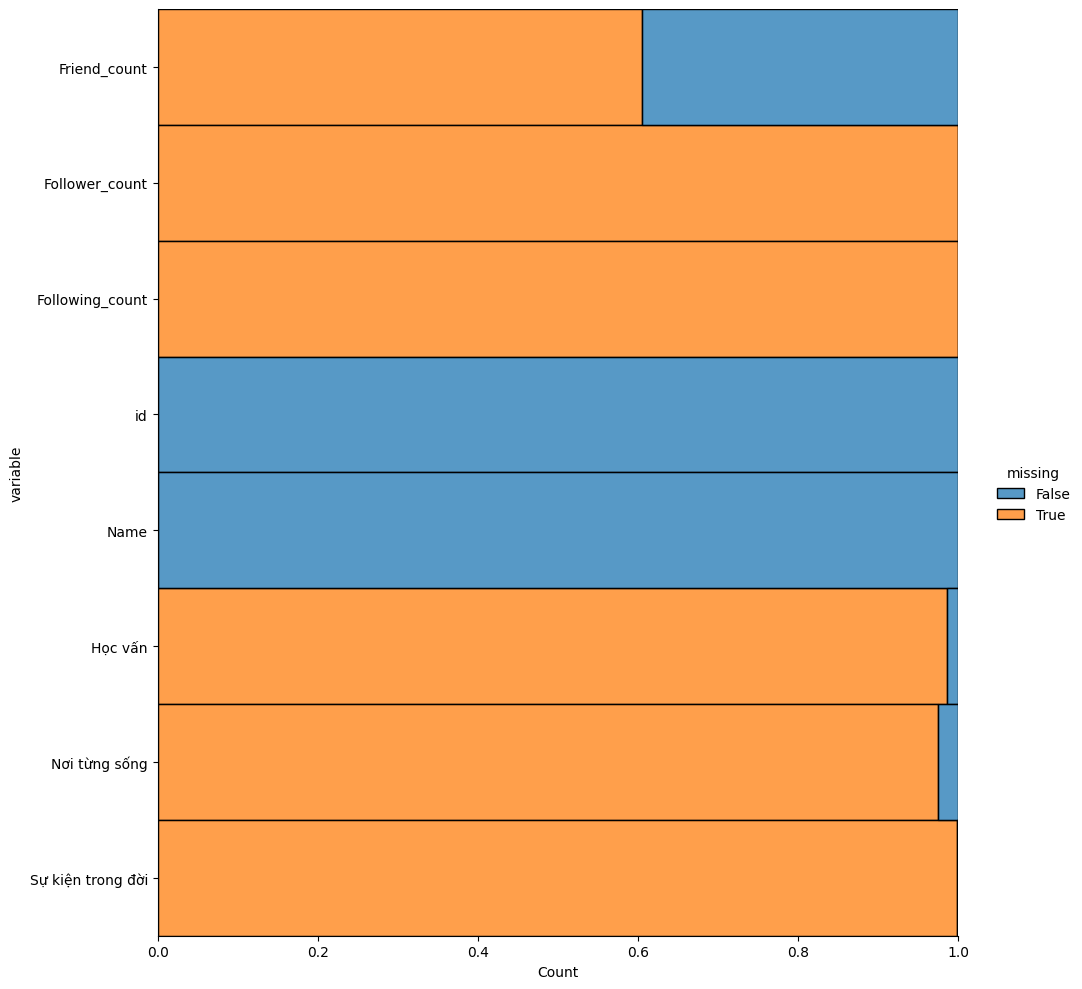

In [443]:
sns.displot(
    data=df.isna().melt(value_name="missing"),
    height= 10,
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1
)


In [428]:
#Loại bỏ các cột bị missing nhiều và không sử dụng trong quá trình phân tích dữ liệu
df = df.drop(['shared_text','original_text', 'video_duration_seconds','video_height'
              , 'video_quality','video_size_MB','video_id','video_thumbnail','video_watches'
              , 'video_width','link', 'factcheck','shared_post_id', 'shared_time', 'shared_user_id'
              , 'shared_username','shared_post_url','with','sharers','image_id','image_ids','was_live','is_live'
              ,'images_description','image','images_lowquality_description','available'], axis ='columns')

In [429]:
#Kiểm tra
df.columns

Index(['post_id', 'text', 'post_text', 'time', 'timestamp', 'image_lowquality',
       'images', 'images_lowquality', 'video', 'likes', 'comments', 'shares',
       'post_url', 'links', 'user_id', 'username', 'user_url', 'comments_full',
       'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'page_id',
       'fetched_time', 'start_url'],
      dtype='object')

In [430]:
df['video'] = df['video'].apply(lambda x: [] if pd.isna(x) else x)

In [431]:
#Loại bỏ các dòng có giá trị bị missing
df = df.dropna(axis=0, how = 'any')

In [432]:
df

,post_id,text,post_text,time,timestamp,image_lowquality,images,images_lowquality,video,likes,...,username,user_url,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,fetched_time,start_url
0,880503520199048,Món đồ chơi mà con trai ai cũng ao ước.,Món đồ chơi mà con trai ai cũng ao ước.,2023-11-30 15:01:03,1701331263,https://scontent.fhan3-1.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-1.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,100,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '882130473295286', 'comment_ur...","[{'name': 'Nguyễn T.An', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/88050...,"{'like': 100, 'love': 1, 'haha': 77, 'wow': 1}",179,633568587122902,2023-11-30 15:50:08.404611,https://m.facebook.com/TheAnhh96/
1,880427826873284,Hành trang sang Thái tác nghiệp tại giải Pubg ...,Hành trang sang Thái tác nghiệp tại giải Pubg ...,2023-11-30 11:03:27,1701317007,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,493,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '879917080385991', 'comment_ur...","[{'name': 'Hoàng Nam', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88042...,"{'like': 493, 'love': 3, 'haha': 236, 'wow': 1...",740,633568587122902,2023-11-30 15:50:19.362991,https://m.facebook.com/TheAnhh96/
2,880163253566408,Thử Thách 1 Ngày Làm Cướp.,Thử Thách 1 Ngày Làm Cướp.,2023-11-30 03:00:58,1701288058,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,741,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1008911857196832', 'comment_u...","[{'name': 'Phong Lê Hoàng Chí', 'link': 'https...",https://www.facebook.com/TheAnhh96/posts/88016...,"{'like': 741, 'love': 1, 'haha': 643, 'wow': 2...",1396,633568587122902,2023-11-30 15:50:51.847323,https://m.facebook.com/TheAnhh96/
3,880093000240100,"Sao, bắn vậy ae đã trớ chưa. ???","Sao, bắn vậy ae đã trớ chưa. ???",2023-11-29 19:09:40,1701259780,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,1174,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1076817627088885', 'comment_u...","[{'name': 'Ngoc Minh', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88009...,"{'like': 1174, 'love': 9, 'haha': 585, 'wow': ...",1783,633568587122902,2023-11-30 15:51:41.896466,https://m.facebook.com/TheAnhh96/
4,880006503582083,Ôi anh Long.,Ôi anh Long.,2023-11-29 15:11:01,1701245461,https://scontent.fhan3-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,[],3718,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '899780788175071', 'comment_ur...","[{'name': 'Nhật Huy', 'link': 'https://faceboo...",https://www.facebook.com/TheAnhh96/posts/88000...,"{'like': 3718, 'love': 19, 'haha': 1448, 'wow'...",5209,633568587122902,2023-11-30 15:51:58.953159,https://m.facebook.com/TheAnhh96/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,835298124719588,Cách Radiant Warmup...,Cách Radiant Warmup...,2023-09-04 15:05:13,1693814713,https://scontent.fhan17-1.fna.fbcdn.net/v/t15....,[],['https://scontent.fhan17-1.fna.fbcdn.net/v/t1...,https://scontent.fhan17-1.fna.fbcdn.net/v/t42....,2827,...,TheAnh96,https://facebook.com/TheAnhh96?eav=AfY6BhLSkxE...,"[{'comment_id': '577230974441803', 'comment_ur...","[{'name': 'Qhoa Nguyen', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/83529...,"{'like': 2827, 'love': 14, 'haha': 4214, 'wow'...",7776,633568587122902,2023-11-30 17:10:47.415424,https://m.facebook.com/p

In [433]:
#Kiểm tra
df.isnull().sum()

post_id              0
text                 0
post_text            0
time                 0
timestamp            0
image_lowquality     0
images               0
images_lowquality    0
video                0
likes                0
comments             0
shares               0
post_url             0
links                0
user_id              0
username             0
user_url             0
comments_full        0
reactors             0
w3_fb_url            0
reactions            0
reaction_count       0
page_id              0
fetched_time         0
start_url            0
dtype: int64

In [434]:
df

,post_id,text,post_text,time,timestamp,image_lowquality,images,images_lowquality,video,likes,...,username,user_url,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,fetched_time,start_url
0,880503520199048,Món đồ chơi mà con trai ai cũng ao ước.,Món đồ chơi mà con trai ai cũng ao ước.,2023-11-30 15:01:03,1701331263,https://scontent.fhan3-1.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-1.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,100,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '882130473295286', 'comment_ur...","[{'name': 'Nguyễn T.An', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/88050...,"{'like': 100, 'love': 1, 'haha': 77, 'wow': 1}",179,633568587122902,2023-11-30 15:50:08.404611,https://m.facebook.com/TheAnhh96/
1,880427826873284,Hành trang sang Thái tác nghiệp tại giải Pubg ...,Hành trang sang Thái tác nghiệp tại giải Pubg ...,2023-11-30 11:03:27,1701317007,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,493,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '879917080385991', 'comment_ur...","[{'name': 'Hoàng Nam', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88042...,"{'like': 493, 'love': 3, 'haha': 236, 'wow': 1...",740,633568587122902,2023-11-30 15:50:19.362991,https://m.facebook.com/TheAnhh96/
2,880163253566408,Thử Thách 1 Ngày Làm Cướp.,Thử Thách 1 Ngày Làm Cướp.,2023-11-30 03:00:58,1701288058,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,741,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1008911857196832', 'comment_u...","[{'name': 'Phong Lê Hoàng Chí', 'link': 'https...",https://www.facebook.com/TheAnhh96/posts/88016...,"{'like': 741, 'love': 1, 'haha': 643, 'wow': 2...",1396,633568587122902,2023-11-30 15:50:51.847323,https://m.facebook.com/TheAnhh96/
3,880093000240100,"Sao, bắn vậy ae đã trớ chưa. ???","Sao, bắn vậy ae đã trớ chưa. ???",2023-11-29 19:09:40,1701259780,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,1174,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1076817627088885', 'comment_u...","[{'name': 'Ngoc Minh', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88009...,"{'like': 1174, 'love': 9, 'haha': 585, 'wow': ...",1783,633568587122902,2023-11-30 15:51:41.896466,https://m.facebook.com/TheAnhh96/
4,880006503582083,Ôi anh Long.,Ôi anh Long.,2023-11-29 15:11:01,1701245461,https://scontent.fhan3-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,[],3718,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '899780788175071', 'comment_ur...","[{'name': 'Nhật Huy', 'link': 'https://faceboo...",https://www.facebook.com/TheAnhh96/posts/88000...,"{'like': 3718, 'love': 19, 'haha': 1448, 'wow'...",5209,633568587122902,2023-11-30 15:51:58.953159,https://m.facebook.com/TheAnhh96/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,835298124719588,Cách Radiant Warmup...,Cách Radiant Warmup...,2023-09-04 15:05:13,1693814713,https://scontent.fhan17-1.fna.fbcdn.net/v/t15....,[],['https://scontent.fhan17-1.fna.fbcdn.net/v/t1...,https://scontent.fhan17-1.fna.fbcdn.net/v/t42....,2827,...,TheAnh96,https://facebook.com/TheAnhh96?eav=AfY6BhLSkxE...,"[{'comment_id': '577230974441803', 'comment_ur...","[{'name': 'Qhoa Nguyen', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/83529...,"{'like': 2827, 'love': 14, 'haha': 4214, 'wow'...",7776,633568587122902,2023-11-30 17:10:47.415424,https://m.facebook.com/p

Duplicate


In [435]:
#Kiểm tra giá trị trùng nhau theo post_id
duplicated_rows = df[df.duplicated(subset='post_id')]
duplicated_post_ids = duplicated_rows['post_id'].tolist()
duplicated_post_ids

[868345134748220,
 867804244802309,
 867694971479903,
 867336684849065,
 867077248208342,
 867053361544064,
 866940954888638,
 853003852949015,
 852796219636445,
 852627252986675,
 852492239666843,
 852461559669911,
 852402473009153,
 852158583033542]

In [436]:
#Xóa các dòng có giá trị trùng nhau theo post_id
df.drop_duplicates(subset=['post_id'], inplace=True)

In [437]:
#Kiểm tra giá trị trùng nhau theo post_id
duplicated_rows = df[df.duplicated(subset='post_id')]
duplicated_post_ids = duplicated_rows['post_id'].tolist()
duplicated_post_ids

[]

In [438]:
df

,post_id,text,post_text,time,timestamp,image_lowquality,images,images_lowquality,video,likes,...,username,user_url,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,fetched_time,start_url
0,880503520199048,Món đồ chơi mà con trai ai cũng ao ước.,Món đồ chơi mà con trai ai cũng ao ước.,2023-11-30 15:01:03,1701331263,https://scontent.fhan3-1.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-1.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,100,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '882130473295286', 'comment_ur...","[{'name': 'Nguyễn T.An', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/88050...,"{'like': 100, 'love': 1, 'haha': 77, 'wow': 1}",179,633568587122902,2023-11-30 15:50:08.404611,https://m.facebook.com/TheAnhh96/
1,880427826873284,Hành trang sang Thái tác nghiệp tại giải Pubg ...,Hành trang sang Thái tác nghiệp tại giải Pubg ...,2023-11-30 11:03:27,1701317007,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,493,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '879917080385991', 'comment_ur...","[{'name': 'Hoàng Nam', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88042...,"{'like': 493, 'love': 3, 'haha': 236, 'wow': 1...",740,633568587122902,2023-11-30 15:50:19.362991,https://m.facebook.com/TheAnhh96/
2,880163253566408,Thử Thách 1 Ngày Làm Cướp.,Thử Thách 1 Ngày Làm Cướp.,2023-11-30 03:00:58,1701288058,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,741,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1008911857196832', 'comment_u...","[{'name': 'Phong Lê Hoàng Chí', 'link': 'https...",https://www.facebook.com/TheAnhh96/posts/88016...,"{'like': 741, 'love': 1, 'haha': 643, 'wow': 2...",1396,633568587122902,2023-11-30 15:50:51.847323,https://m.facebook.com/TheAnhh96/
3,880093000240100,"Sao, bắn vậy ae đã trớ chưa. ???","Sao, bắn vậy ae đã trớ chưa. ???",2023-11-29 19:09:40,1701259780,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,1174,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1076817627088885', 'comment_u...","[{'name': 'Ngoc Minh', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88009...,"{'like': 1174, 'love': 9, 'haha': 585, 'wow': ...",1783,633568587122902,2023-11-30 15:51:41.896466,https://m.facebook.com/TheAnhh96/
4,880006503582083,Ôi anh Long.,Ôi anh Long.,2023-11-29 15:11:01,1701245461,https://scontent.fhan3-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,[],3718,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '899780788175071', 'comment_ur...","[{'name': 'Nhật Huy', 'link': 'https://faceboo...",https://www.facebook.com/TheAnhh96/posts/88000...,"{'like': 3718, 'love': 19, 'haha': 1448, 'wow'...",5209,633568587122902,2023-11-30 15:51:58.953159,https://m.facebook.com/TheAnhh96/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,835298124719588,Cách Radiant Warmup...,Cách Radiant Warmup...,2023-09-04 15:05:13,1693814713,https://scontent.fhan17-1.fna.fbcdn.net/v/t15....,[],['https://scontent.fhan17-1.fna.fbcdn.net/v/t1...,https://scontent.fhan17-1.fna.fbcdn.net/v/t42....,2827,...,TheAnh96,https://facebook.com/TheAnhh96?eav=AfY6BhLSkxE...,"[{'comment_id': '577230974441803', 'comment_ur...","[{'name': 'Qhoa Nguyen', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/83529...,"{'like': 2827, 'love': 14, 'haha': 4214, 'wow'...",7776,633568587122902,2023-11-30 17:10:47.415424,https://m.facebook.com/p

In [439]:
#Resert index
df.index = [i for i in range(len(df))]
df

,post_id,text,post_text,time,timestamp,image_lowquality,images,images_lowquality,video,likes,...,username,user_url,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,fetched_time,start_url
0,880503520199048,Món đồ chơi mà con trai ai cũng ao ước.,Món đồ chơi mà con trai ai cũng ao ước.,2023-11-30 15:01:03,1701331263,https://scontent.fhan3-1.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-1.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,100,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '882130473295286', 'comment_ur...","[{'name': 'Nguyễn T.An', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/88050...,"{'like': 100, 'love': 1, 'haha': 77, 'wow': 1}",179,633568587122902,2023-11-30 15:50:08.404611,https://m.facebook.com/TheAnhh96/
1,880427826873284,Hành trang sang Thái tác nghiệp tại giải Pubg ...,Hành trang sang Thái tác nghiệp tại giải Pubg ...,2023-11-30 11:03:27,1701317007,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,493,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '879917080385991', 'comment_ur...","[{'name': 'Hoàng Nam', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88042...,"{'like': 493, 'love': 3, 'haha': 236, 'wow': 1...",740,633568587122902,2023-11-30 15:50:19.362991,https://m.facebook.com/TheAnhh96/
2,880163253566408,Thử Thách 1 Ngày Làm Cướp.,Thử Thách 1 Ngày Làm Cướp.,2023-11-30 03:00:58,1701288058,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,741,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1008911857196832', 'comment_u...","[{'name': 'Phong Lê Hoàng Chí', 'link': 'https...",https://www.facebook.com/TheAnhh96/posts/88016...,"{'like': 741, 'love': 1, 'haha': 643, 'wow': 2...",1396,633568587122902,2023-11-30 15:50:51.847323,https://m.facebook.com/TheAnhh96/
3,880093000240100,"Sao, bắn vậy ae đã trớ chưa. ???","Sao, bắn vậy ae đã trớ chưa. ???",2023-11-29 19:09:40,1701259780,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,1174,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '1076817627088885', 'comment_u...","[{'name': 'Ngoc Minh', 'link': 'https://facebo...",https://www.facebook.com/TheAnhh96/posts/88009...,"{'like': 1174, 'love': 9, 'haha': 585, 'wow': ...",1783,633568587122902,2023-11-30 15:51:41.896466,https://m.facebook.com/TheAnhh96/
4,880006503582083,Ôi anh Long.,Ôi anh Long.,2023-11-29 15:11:01,1701245461,https://scontent.fhan3-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,[],3718,...,TheAnh96,https://facebook.com/TheAnhh96?lst=61554124950...,"[{'comment_id': '899780788175071', 'comment_ur...","[{'name': 'Nhật Huy', 'link': 'https://faceboo...",https://www.facebook.com/TheAnhh96/posts/88000...,"{'like': 3718, 'love': 19, 'haha': 1448, 'wow'...",5209,633568587122902,2023-11-30 15:51:58.953159,https://m.facebook.com/TheAnhh96/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,835298124719588,Cách Radiant Warmup...,Cách Radiant Warmup...,2023-09-04 15:05:13,1693814713,https://scontent.fhan17-1.fna.fbcdn.net/v/t15....,[],['https://scontent.fhan17-1.fna.fbcdn.net/v/t1...,https://scontent.fhan17-1.fna.fbcdn.net/v/t42....,2827,...,TheAnh96,https://facebook.com/TheAnhh96?eav=AfY6BhLSkxE...,"[{'comment_id': '577230974441803', 'comment_ur...","[{'name': 'Qhoa Nguyen', 'link': 'https://face...",https://www.facebook.com/TheAnhh96/posts/83529...,"{'like': 2827, 'love': 14, 'haha': 4214, 'wow'...",7776,633568587122902,2023-11-30 17:10:47.415424,https://m.facebook.com/p

In [440]:
df.to_csv('Data\TheAnhh966_clean.csv')